# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [9]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [11]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL


### 0.3. Import

In [100]:
library(imbalance)

## 1. Import Data

In [14]:
input_data = read.csv("diabetes_full_data.csv")

In [15]:
df = data.frame(input_data)

In [16]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [17]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [45]:
colnames(df)

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "BMI"                  "Smoker"               "Stroke"              
 [7] "HeartDiseaseorAttack" "PhysActivity"         "Fruits"              
[10] "Veggies"              "HvyAlcoholConsump"    "AnyHealthcare"       
[13] "NoDocbcCost"          "GenHlth"              "MentHlth"            
[16] "PhysHlth"             "DiffWalk"             "Sex"                 
[19] "Age"                  "Education"            "Income"              
[22] "Diabetes_binary"

In [46]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [36]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [30]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [56]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [54]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [55]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [39]:
sum(is.na(df))

[1] 0

In [52]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [51]:
# COMMENT
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [43]:
nrow(subset(df, Age == 14))

[1] 0

In [57]:
# COMMENT
# The dataset has no missing data.

## 3. Exploratory data analysis (EDA)

In [60]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("topright", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [63]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 3.1. Response variable analysis

In [67]:
response_col = "Diabetes_binary"

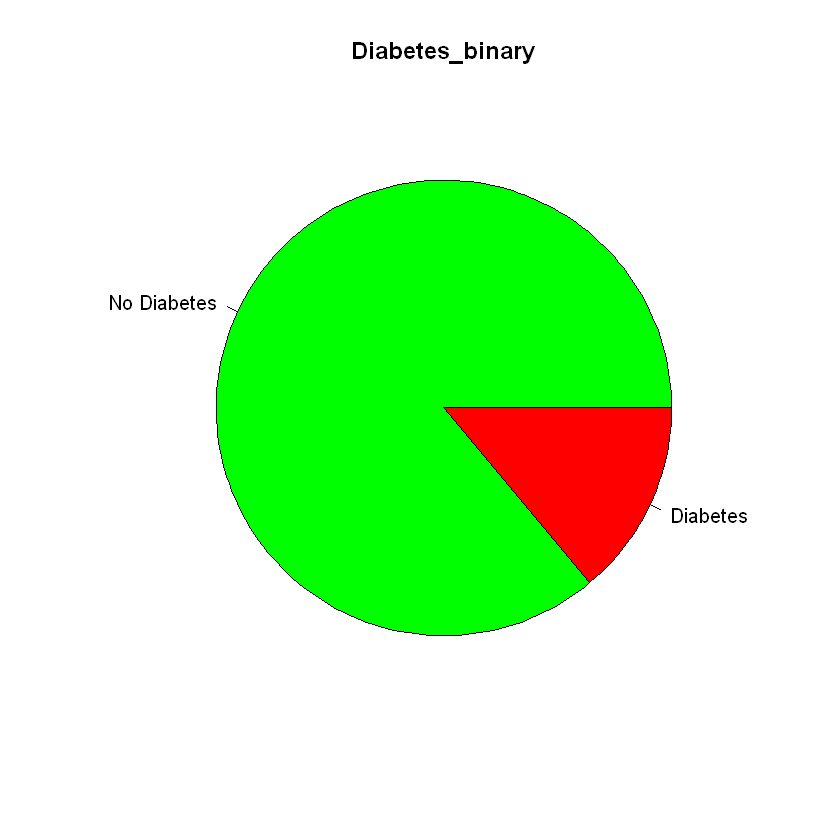

In [68]:
pie(table(df[, response_col]), main = response_col, col = c("green", "red"),
    labels = c("No Diabetes", "Diabetes"), )

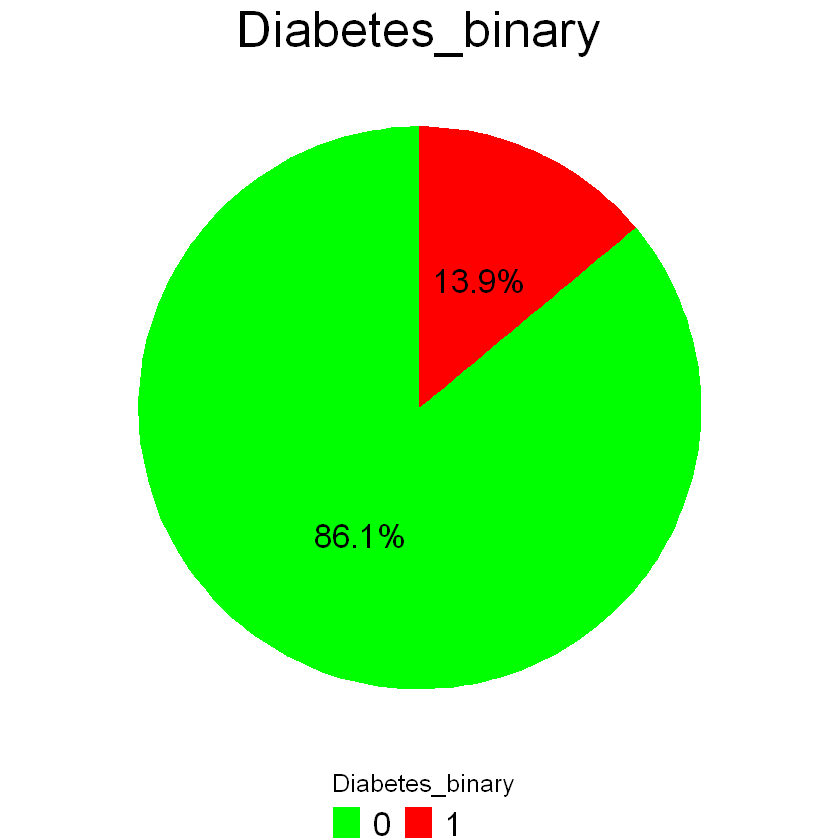

In [93]:
library(ggplot2)

# Assuming df is your dataframe and response_col is the column containing the response variable
response_col <- "Diabetes_binary"

# Creating a table of counts for each category in the response column
response_table <- table(df[, response_col])

# Converting the table into a data frame
response_df <- as.data.frame(response_table)

# Renaming the column
colnames(response_df) <- c("Response", "Count")

# Calculate percentages
response_df$Percent <- response_df$Count / sum(response_df$Count) * 100

# Creating a pie chart using ggplot2
pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("green", "red")) + 
  labs(title = response_col) +
  theme_void() +
  theme(legend.position = "bottom", 
        plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
        legend.text = element_text(size = 20)) +            # Adjust legend text size here
  geom_text(aes(label = paste0(round(Percent, 1), "%")), 
            position = position_stack(vjust = 0.5),
            size = 7) + # Adjust label size here
  guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here

# Displaying the pie chart
print(pie_chart)

In [92]:
# COMMENT
# The dataset is imbalanced
# => Apply oversampling method

### 3.1. Dataset oversampling